# 1. Importation des Librairies

In [1]:
# 1. Importation des Librairies
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# 2. Chargement des donnees

In [2]:
# 2. Chargement des donnees
data = pd.read_csv('Data/USA_Housing.csv')

In [4]:
data = data[["Avg. Area Income","Price"]]

In [5]:
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


# 3. Analyse des donnees

In [6]:
# 3. Analyse des donnees
data.isnull().sum() # Verification de valeurs manquantes

Avg. Area Income    0
Price               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg. Area Income  5000 non-null   float64
 1   Price             5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [8]:
data['Avg. Area Income'].max()

np.float64(107701.74837763936)

In [9]:
data['Avg. Area Income'].min()

np.float64(17796.631189543397)

In [10]:
print(data['Avg. Area Income'].max())

107701.74837763936


In [13]:
print("Max Area Income:",data['Price'].max())

Max Area Income: 2469065.5941747027


In [14]:
print("Max Area Income:",data['Price'].min())

Max Area Income: 15938.657923287848


# 4. Division du modèle

In [15]:
data.head(5)

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


## Variables Indep et Varibale Dep

In [16]:
X = data.iloc[ : , :-1].values
y = data.iloc[ : , -1].values

# 4.1 Separation de donnees : Train et Test

In [17]:
#X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=40)

In [19]:
print("X-train Shape:", X_train.shape)
print("X-test Shape:", X_test.shape)
print("y-train Shape:", y_train.shape)
print("y-test Shape:", y_test.shape)

X-train Shape: (3750, 1)
X-test Shape: (1250, 1)
y-train Shape: (3750,)
y-test Shape: (1250,)


# 5. Construire le Modele

In [20]:
# Importer l'algorithme de la Regression Linear
from sklearn.linear_model import LinearRegression

In [21]:
model_lineaire = LinearRegression()

In [22]:
# Entrainement du modele
model_lineaire.fit(X_train, y_train)

LinearRegression()

In [33]:
# Faire de prediction
y_Price_predits = model_lineaire.predict(X_test)

In [34]:
y_Price_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [25]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [35]:
resultats = pd.DataFrame(y_test, y_Price_predits)
resultats

,0
1.375828e+06,1.435770e+06
1.594792e+06,1.668448e+06
1.378886e+06,1.762215e+06
1.121330e+06,1.106261e+06
1.001248e+06,1.051124e+06
...,...
9.409852e+05,7.054441e+05
1.629427e+06,1.358647e+06
1.092890e+06,9.750058e+05
1.437100e+06,1.393996e+06


In [37]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
print("MSE de la Regression Lineaire:", mean_squared_error(
    y_test, y_Price_predits))

MSE de la Regression Lineaire: 70345556190.3212


In [39]:
print("R2 Score de la Regression Lineaire :", r2_score(
    y_test, y_Price_predits))

R2 Score de la Regression Lineaire : 0.43322233931263276


# 6. Visualisation de Resultats

In [40]:
import matplotlib.pyplot as plt

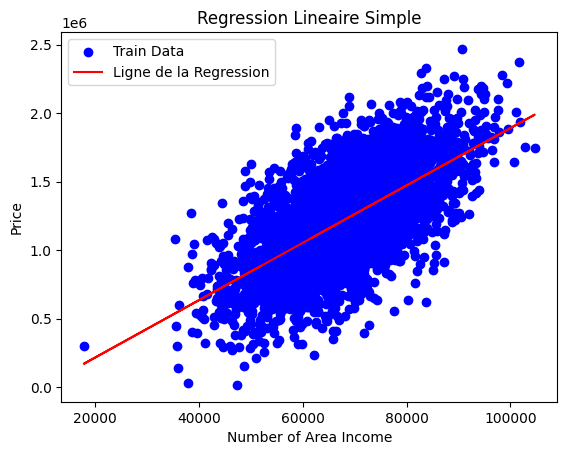

In [42]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, model_lineaire.predict(X_train), color='red', label='Ligne de la Regression')
plt.xlabel('Number of Area Income')
plt.ylabel('Price')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

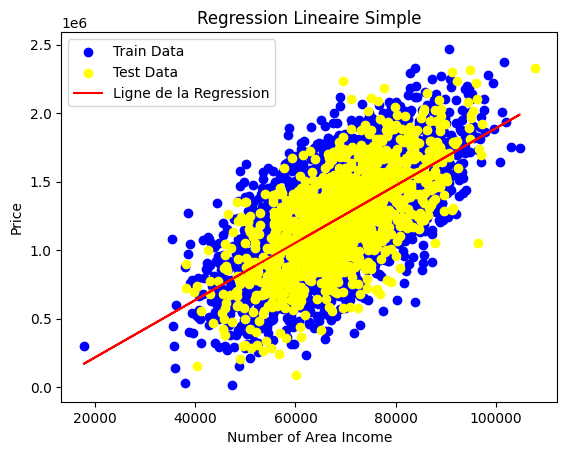

In [55]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='yellow', label='Test Data')
plt.plot(X_train, model_lineaire.predict(X_train), color='red', label='Ligne de la Regression')
plt.xlabel('Number of Area Income')
plt.ylabel('Price')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

# 7. Prediction simple

In [44]:
data.head(5)

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


In [45]:
resultats = pd.DataFrame({'y-Price-reel': y_test, 'y-Price-predits':y_Price_predits})
resultats

,y-Price-reel,y-Price-predits
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


In [46]:
y_scores_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [49]:
print(model_lineaire.predict([[123]]))

[-199742.16187504]


In [50]:
resultats

,y-Price-reel,y-Price-predits
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


# 8. soustraction

In [52]:
sub = y_test - y_Price_predits
sub

array([  59942.16581759,   73655.63722844,  383328.55568549, ...,
       -117884.02706696,  -43104.16150386, -350372.46286661],
      shape=(1250,))

In [54]:
resultats = pd.DataFrame({
     'y-price-reel': y_test, 
    'y-price-predicts': y_Price_predits,
    'reste':sub
})
resultats

,y-price-reel,y-price-predicts,reste
0,1.435770e+06,1.375828e+06,59942.165818
1,1.668448e+06,1.594792e+06,73655.637228
2,1.762215e+06,1.378886e+06,383328.555685
3,1.106261e+06,1.121330e+06,-15068.763964
4,1.051124e+06,1.001248e+06,49875.895328
...,...,...,...
1245,7.054441e+05,9.409852e+05,-235541.106927
1246,1.358647e+06,1.629427e+06,-270780.446581
1247,9.750058e+05,1.092890e+06,-117884.027067
1248,1.393996e+06,1.437100e+06,-43104.161504
